In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pywaffle
import squarify
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("top250-00-19.csv")

In [80]:
df.sort_values('Transfer_fee', ascending = False).head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee
4211,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,222000000
4455,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,135000000
4212,Philippe Coutinho,Attacking Midfield,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,125000000
4456,Cristiano Ronaldo,Centre Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,117000000
4213,Ousmane Dembélé,Right Winger,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017-2018,115000000
3961,Paul Pogba,Central Midfield,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,105000000
3217,Gareth Bale,Right Winger,24,Spurs,Premier League,Real Madrid,LaLiga,2013-2014,101000000
2226,Cristiano Ronaldo,Centre Forward,24,Man Utd,Premier League,Real Madrid,LaLiga,2009-2010,94000000
3962,Gonzalo Higuaín,Centre Forward,28,SSC Napoli,Serie A,Juventus,Serie A,2016-2017,90000000
3218,Neymar,Left Winger,21,Santos FC,Série A,FC Barcelona,LaLiga,2013-2014,88200000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [5]:
df.drop('Market_value', axis=1, inplace=True)

In [6]:
df['Position'].unique()


array(['Right Winger', 'Centre-Forward', 'Left Winger', 'Centre-Back',
       'Central Midfield', 'Attacking Midfield', 'Defensive Midfield',
       'Second Striker', 'Goalkeeper', 'Right-Back', 'Left Midfield',
       'Left-Back', 'Right Midfield', 'Forward', 'Sweeper', 'Defender',
       'Midfielder'], dtype=object)

In [7]:
position = df['Position'].value_counts().rename_axis('Position').reset_index(name='counts')
position

,Position,counts
0,Centre-Forward,1218
1,Centre-Back,714
2,Central Midfield,487
3,Attacking Midfield,426
4,Defensive Midfield,411
5,Right Winger,305
6,Left Winger,267
7,Left-Back,225
8,Right-Back,181
9,Goalkeeper,180


In [8]:
df['Position'] = df['Position'].replace(['Sweeper', 'Defender'], 'Defensive Midfield')
df['Position'] = df['Position'].replace(['Forward'], 'Centre Forward')
df['Position'] = df['Position'].replace(['Midfielder'], 'Defensive Midfield')
df['Position'] = df['Position'].replace(['Centre-Forward'], 'Centre Forward')
df['Position'] = df['Position'].replace(['Centre-Back'], 'Centre Back')
df['Position'] = df['Position'].replace(['Left-Back'], 'Left Back')
df['Position'] = df['Position'].replace(['Right-Back'], 'Right Back')

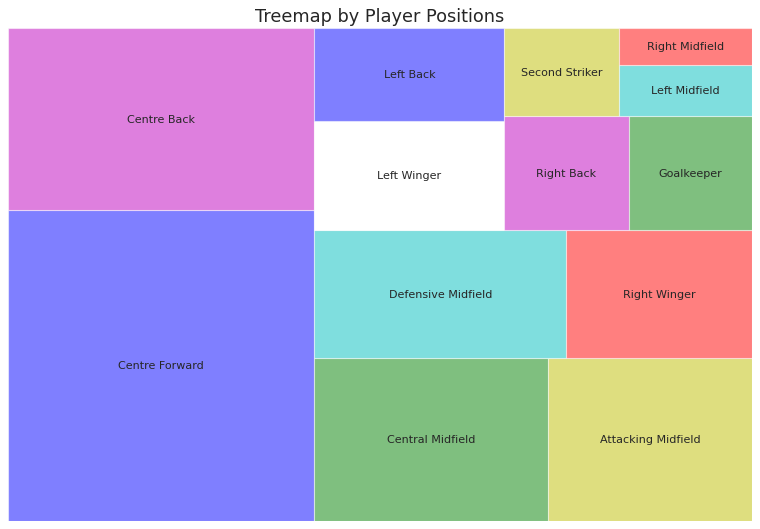

In [60]:
position = df['Position'].value_counts().rename_axis('Position').reset_index(name='counts')

sizes = position['counts']
names = position['Position']
color = ['b','m','g','y','c','r','w']
plt.figure(figsize = (12,8), dpi=80)

squarify.plot(sizes = sizes, label = names, alpha = 0.5, color = color)
plt.axis('off')
plt.title('Treemap by Player Positions', fontsize = 16)
plt.show()

In [61]:
grouped_league_to = df.groupby('League_to')['Transfer_fee'].aggregate([min,np.mean,max,sum]).sort_values('sum', ascending = False).reset_index().head(10)
grouped_league_to

,League_to,min,mean,max,sum
0,Premier League,950000,1.170016e+07,105000000,14695400000
1,Serie A,900000,1.019651e+07,117000000,7535220000
2,LaLiga,950000,1.272450e+07,125000000,6680360000
3,Ligue 1,1000000,9.276373e+06,222000000,3682720000
4,1.Bundesliga,825000,8.529964e+06,43000000,3599645000
5,Premier Liga,1000000,6.749573e+06,40000000,2213860000
6,Super League,1200000,9.756393e+06,60000000,1190280000
7,Liga NOS,1000000,6.295748e+06,22000000,799560000
8,Süper Lig,1000000,4.770140e+06,17050000,682130000
9,Eredivisie,950000,5.046296e+06,16250000,545000000


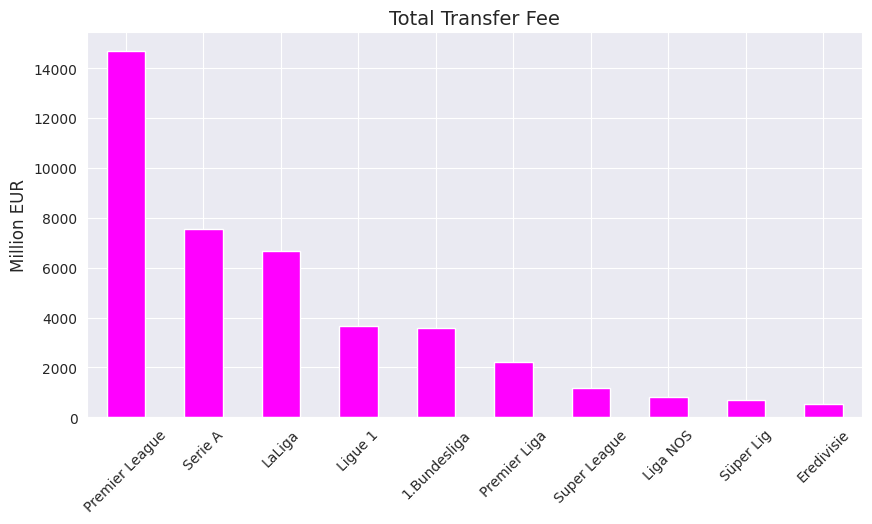

In [90]:
sns.set_style("darkgrid")


fig, ax = plt.subplots(figsize = (10,5))
(grouped_league_to['sum']/1000000).sort_values(ascending = False).plot(kind = 'bar', color = 'magenta')
plt.xticks(range(len(grouped_league_to['League_to'])), grouped_league_to['League_to'], rotation = 45)
plt.ylabel('Million EUR', fontsize = 12)
plt.title('Total Transfer Fee', fontsize = 14)
           
plt.show()

## Premier League

In [163]:
df['Team_to'] = df['Team_to'].replace(['Spurs'], 'Tottenham')

In [164]:
premier = df['League_to'] == 'Premier League'
df_premier = df[premier]
df_premier.sort_values('Transfer_fee', ascending = False).head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee
3961,Paul Pogba,Central Midfield,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,105000000
4214,Romelu Lukaku,Centre Forward,24,Everton,Premier League,Man Utd,Premier League,2017-2018,84700000
4215,Virgil van Dijk,Centre Back,26,Southampton,Premier League,Liverpool,Premier League,2017-2018,78800000
3713,Kevin De Bruyne,Attacking Midfield,24,VfL Wolfsburg,1.Bundesliga,Man City,Premier League,2015-2016,76000000
3469,Ángel Di María,Right Winger,26,Real Madrid,LaLiga,Man Utd,Premier League,2014-2015,75000000


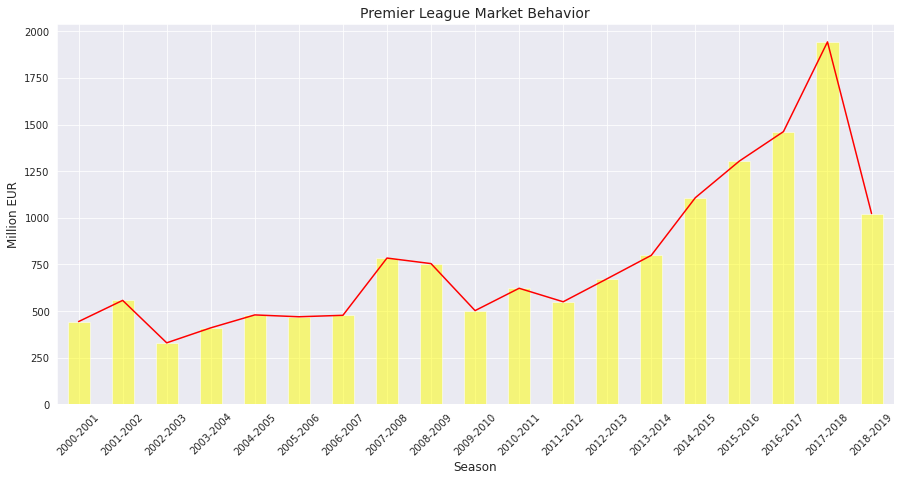

In [169]:
grouped_df_premier = df_premier.groupby('Season')['Transfer_fee'].aggregate(['sum']).reset_index()

fig, ax = plt.subplots(figsize = (15,7))
(grouped_df_premier['sum']/1000000).plot(color = 'red')
(grouped_df_premier['sum']/1000000).plot(kind = 'bar', color = 'yellow', alpha = 0.5)
plt.xticks(range(len(grouped_df_premier['Season'])),grouped_df_premier['Season'], rotation = 45)
plt.ylabel('Million EUR', fontsize = 12)
plt.xlabel('Season', fontsize = 12)
plt.title('Premier League Market Behavior', fontsize = 14)

plt.show()

In [166]:
df_grouped_teams = df_premier.groupby(['Team_to', 'Season'])['Transfer_fee'].aggregate('sum').reset_index()
df_grouped_teams

,Team_to,Season,Transfer_fee
0,Arsenal,2000-2001,53300000
1,Arsenal,2001-2002,31250000
2,Arsenal,2002-2003,10730000
3,Arsenal,2003-2004,30250000
4,Arsenal,2004-2005,11700000
...,...,...,...
353,Wolves,2003-2004,9500000
354,Wolves,2009-2010,7600000
355,Wolves,2010-2011,14050000
356,Wolves,2011-2012,11750000


In [167]:
top_5_teams = df_premier.groupby('Team_to')['Transfer_fee'].aggregate('sum').sort_values(ascending = False).reset_index().head(5)
top_5_teams

,Team_to,Transfer_fee
0,Chelsea,1820650000
1,Man City,1779660000
2,Man Utd,1497360000
3,Liverpool,1412420000
4,Tottenham,1024400000


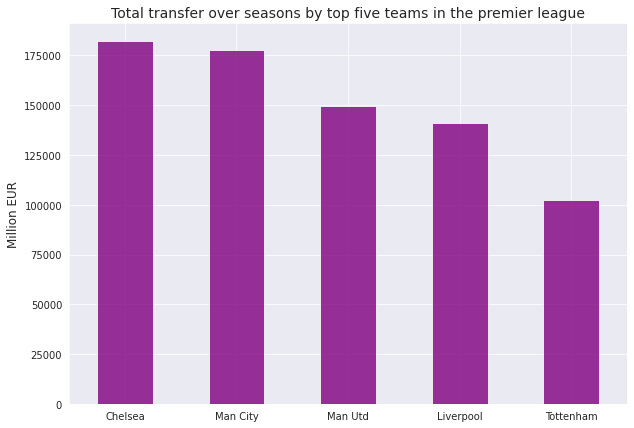

In [186]:
fig, ax = plt.subplots(figsize = (10,7))

(top_5_teams['Transfer_fee']/10000).plot(kind = 'bar', color = 'purple', alpha = 0.8)
plt.xticks(range(len(top_5_teams['Team_to'])), top_5_teams['Team_to'], rotation = 'horizontal')
plt.ylabel('Million EUR', fontsize = 12)
plt.title('Total transfer over seasons by top five teams in the premier league', fontsize = 14)

plt.show()

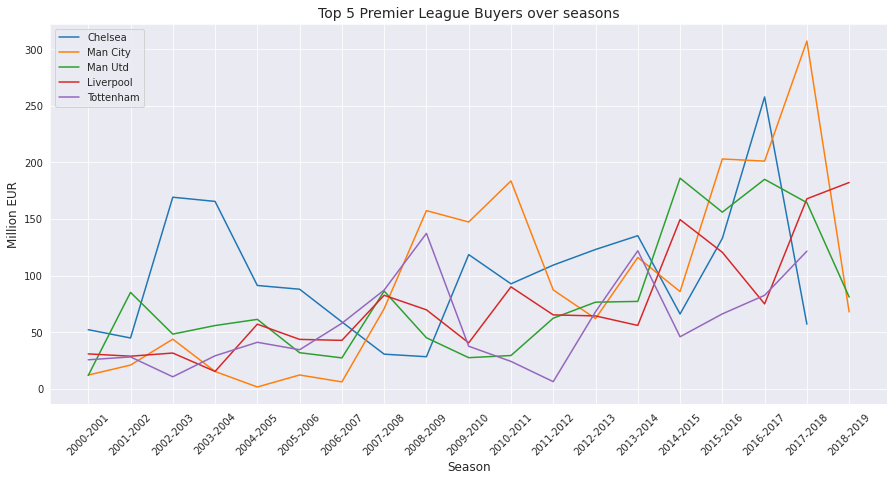

In [182]:
fig, ax = plt.subplots(figsize = (15,7))

for team in range(len(list(top_5_teams['Team_to']))):
    top_team = df['Team_to'] == top_5_teams['Team_to'][team]
    df_top_team = df[top_team]
    grouped_df_top_team = df_top_team.groupby('Season')['Transfer_fee'].aggregate(['sum']).reset_index()
    (grouped_df_top_team['sum']/1000000).plot()
    plt.legend(list(top_5_teams['Team_to']))

plt.xticks(range(len(grouped_df_premier['Season'])),grouped_df_premier['Season'], rotation = 45)
plt.ylabel('Million EUR', fontsize = 12)
plt.xlabel('Season', fontsize = 12)
plt.title('Top 5 Premier League Buyers over seasons', fontsize = 14)    
    
plt.show()